**Data Analytics Coursework**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/QMUL/Semester 2/Data analytics/CW/German Air Fares.csv') #reading in dataset to google colab that is downloaded on google drive

In [ ]:
df.columns #checking columns in dataset

Index(['departure_city', 'arrival_city', 'scrape_date', 'departure_date',
       'departure_date_distance', 'departure_time', 'arrival_time', 'airline',
       'stops', 'price (€)'],
      dtype='object')

In [ ]:
df.dtypes #seeing types of features

departure_city             object
arrival_city               object
scrape_date                object
departure_date             object
departure_date_distance    object
departure_time             object
arrival_time               object
airline                    object
stops                      object
price (€)                  object
dtype: object

In [ ]:
df.shape

(62627, 10)

In [ ]:
df

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price (€)
0,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:30am,7:45am,Eurowings,direct,74.00
1,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:40am,7:55am,easyJet,direct,75.00
2,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:45am,8:00am,easyJet,direct,80.00
3,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:15am,7:30am,Eurowings,direct,84.00
4,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:55am,8:10am,Eurowings,direct,84.00
...,...,...,...,...,...,...,...,...,...,...
62622,STR Stuttgart,HAJ Hannover,24.10.2019,24.04.2020,6 months,10:30 Uhr,11:40 Uhr,Eurowings,direct,102.00
62623,STR Stuttgart,HAJ Hannover,24.10.2019,24.04.2020,6 months,07:00 Uhr,08:05 Uhr,Eurowings,direct,192.00
62624,STR Stuttgart,LEJ Leipzig/Halle,24.10.2019,24.04.2020,6 months,15:05 Uhr,16:10 Uhr,Eurowings,direct,72.00
62625,STR Stuttgart,LEJ Leipzig/Halle,24.10.2019,24.04.2020,6 months,06:15 Uhr,07:25 Uhr,Eurowings,direct,72.00


# **Preprocessing**

In [ ]:
df.rename(columns={'price (€)': 'price'}, inplace=True) #replacing feature name so it is easier to type

In [ ]:
df['price'] = df['price'].str.replace(',', '') #removing all commas in dataset important for numbers

df

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price
0,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:30am,7:45am,Eurowings,direct,74.00
1,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:40am,7:55am,easyJet,direct,75.00
2,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:45am,8:00am,easyJet,direct,80.00
3,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:15am,7:30am,Eurowings,direct,84.00
4,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:55am,8:10am,Eurowings,direct,84.00
...,...,...,...,...,...,...,...,...,...,...
62622,STR Stuttgart,HAJ Hannover,24.10.2019,24.04.2020,6 months,10:30 Uhr,11:40 Uhr,Eurowings,direct,102.00
62623,STR Stuttgart,HAJ Hannover,24.10.2019,24.04.2020,6 months,07:00 Uhr,08:05 Uhr,Eurowings,direct,192.00
62624,STR Stuttgart,LEJ Leipzig/Halle,24.10.2019,24.04.2020,6 months,15:05 Uhr,16:10 Uhr,Eurowings,direct,72.00
62625,STR Stuttgart,LEJ Leipzig/Halle,24.10.2019,24.04.2020,6 months,06:15 Uhr,07:25 Uhr,Eurowings,direct,72.00


In [ ]:
df['price'] = df['price'].astype(float) #converting price column type from object to float64 to int
df['price'] = df['price'].astype(int)
df.dtypes

departure_city             object
arrival_city               object
scrape_date                object
departure_date             object
departure_date_distance    object
departure_time             object
arrival_time               object
airline                    object
stops                      object
price                       int64
dtype: object

In [ ]:
df = df.replace('(1 Stopp)','(1 stop)') #replace values as dataset has 1 stopp (German language) and 1 stop as options
df = df.replace('(2 Stopps)','(2 stops)') #replaced 2 stopps for uniformity

In [ ]:
df = df.drop_duplicates() #dropping duplicates
df.shape

(61823, 10)

In [ ]:
df.head()

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price
0,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:30am,7:45am,Eurowings,direct,74
1,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:40am,7:55am,easyJet,direct,75
2,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:45am,8:00am,easyJet,direct,80
3,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:15am,7:30am,Eurowings,direct,84
4,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:55am,8:10am,Eurowings,direct,84


In [ ]:
print(df['departure_city'].value_counts()) #seeing departure cities and their values



TXL Berlin-Tegel         12729
DUS Düsseldorf            6504
MUC München               6326
HAM Hamburg               5968
STR Stuttgart             4626
CGN Köln/Bonn             4470
NUE Nürnberg              3980
FRA Frankfurt/Main        3845
FDH Friedrichshafen       2651
DRS Dresden               2615
LEJ Leipzig/Halle         2272
HAJ Hannover              1543
BRE Bremen                1453
FKB Karlsruhe/Baden-B     1284
FMO Münster/Osnabrück      638
SCN Saarbrücken            465
DTM Dortmund               228
PAD Paderborn/Lippsta      165
RLG Rostock-Laage           60
Name: departure_city, dtype: int64


In [ ]:
print(df['arrival_city'].value_counts()) #same for arrival cities

TXL Berlin-Tegel         12368
MUC München               7193
HAM Hamburg               5980
DUS Düsseldorf            5841
FRA Frankfurt/Main        4853
CGN Köln/Bonn             4783
STR Stuttgart             4718
NUE Nürnberg              4367
FDH Friedrichshafen       2590
DRS Dresden               2179
LEJ Leipzig/Halle         1934
FKB Karlsruhe/Baden-B     1383
HAJ Hannover              1278
BRE Bremen                1106
SCN Saarbrücken            534
FMO Münster/Osnabrück      251
DTM Dortmund               242
PAD Paderborn/Lippsta      162
RLG Rostock-Laage           60
Name: arrival_city, dtype: int64


In [ ]:
print(df[df.notnull()]) #checking for null values, one identified in row 62626

              departure_city           arrival_city scrape_date  \
0      TXL Berlin-Tegel       DUS Düsseldorf         18.10.2019   
1      TXL Berlin-Tegel       DUS Düsseldorf         18.10.2019   
2      TXL Berlin-Tegel       DUS Düsseldorf         18.10.2019   
3      TXL Berlin-Tegel       DUS Düsseldorf         18.10.2019   
4      TXL Berlin-Tegel       DUS Düsseldorf         18.10.2019   
...                      ...                    ...         ...   
62622  STR Stuttgart          HAJ Hannover           24.10.2019   
62623  STR Stuttgart          HAJ Hannover           24.10.2019   
62624  STR Stuttgart          LEJ Leipzig/Halle      24.10.2019   
62625  STR Stuttgart          LEJ Leipzig/Halle      24.10.2019   
62626                    NaN                    NaN         NaN   

      departure_date departure_date_distance departure_time arrival_time  \
0         25.10.2019                  1 week         6:30am       7:45am   
1         25.10.2019                  1 wee

In [ ]:
df = df.drop(index=62626) #dropping null value

In [ ]:
#df = df.drop('scrape_date', axis = 1) #dropping the scrape date as believed to not be relevant


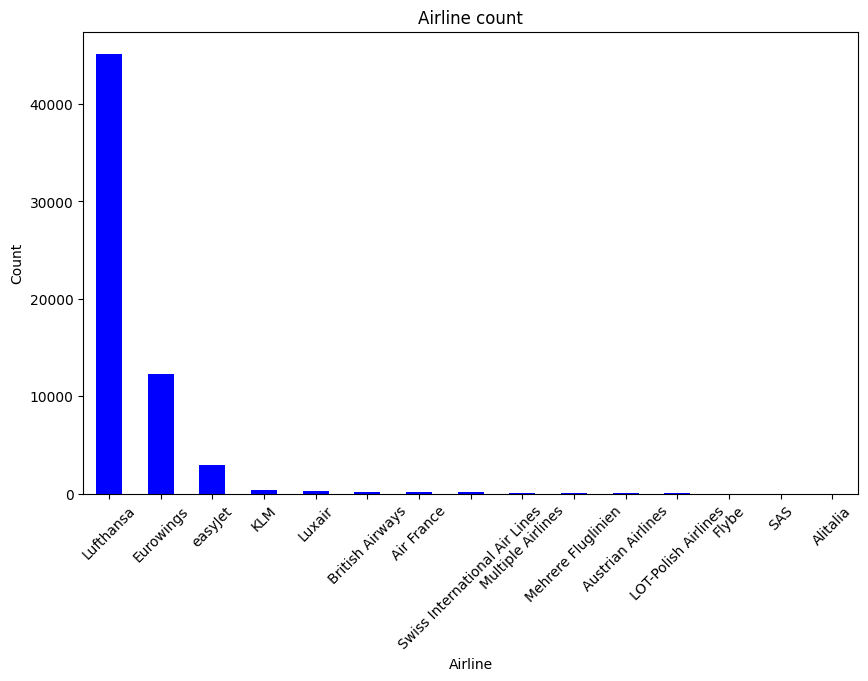

In [ ]:
y = df['airline'].value_counts()


plt.figure(figsize=(10, 6))
y.plot(kind='bar', color='blue')

plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline count')

plt.xticks(rotation=45)

plt.show()

#visualising the distribution between airlines and the amount of flights in dataset, Lufthansa dominates

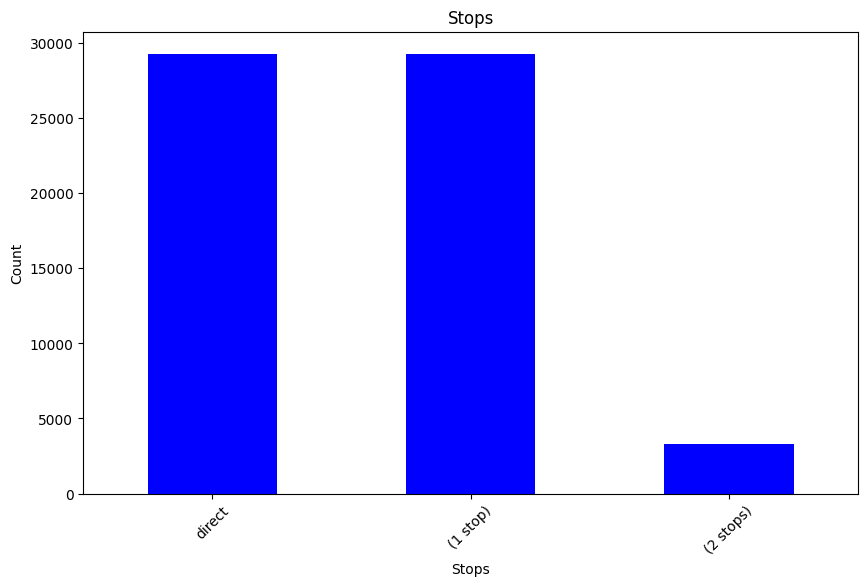

In [ ]:
y = df['stops'].value_counts()


plt.figure(figsize=(10, 6))
y.plot(kind='bar', color='blue')

plt.xlabel('Stops')
plt.ylabel('Count')
plt.title('Stops')

plt.xticks(rotation=45)

plt.show()



#seeing the distrubtion of stops, appears direct and 1-stop are the same

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61822 entries, 0 to 62625
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   departure_city           61822 non-null  object
 1   arrival_city             61822 non-null  object
 2   scrape_date              61822 non-null  object
 3   departure_date           61822 non-null  object
 4   departure_date_distance  61822 non-null  object
 5   departure_time           61822 non-null  object
 6   arrival_time             61822 non-null  object
 7   airline                  61822 non-null  object
 8   stops                    61822 non-null  object
 9   price                    61822 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 5.2+ MB


In [ ]:
le = preprocessing.LabelEncoder() #encoding the dataframe using label encoding

df2 = df.apply(le.fit_transform) #creating this to a new dataframe which can be used for training ml


df2

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price
0,18,4,0,33,1,321,361,4,2,48
1,18,4,0,33,1,325,365,14,2,49
2,18,4,0,33,1,327,367,14,2,54
3,18,4,0,33,1,315,355,4,2,58
4,18,4,0,33,1,331,371,4,2,58
...,...,...,...,...,...,...,...,...,...,...
62621,17,9,6,31,5,158,174,4,2,26
62622,17,9,6,31,5,69,102,4,2,76
62623,17,9,6,31,5,14,15,4,2,166
62624,17,11,6,31,5,158,175,4,2,46


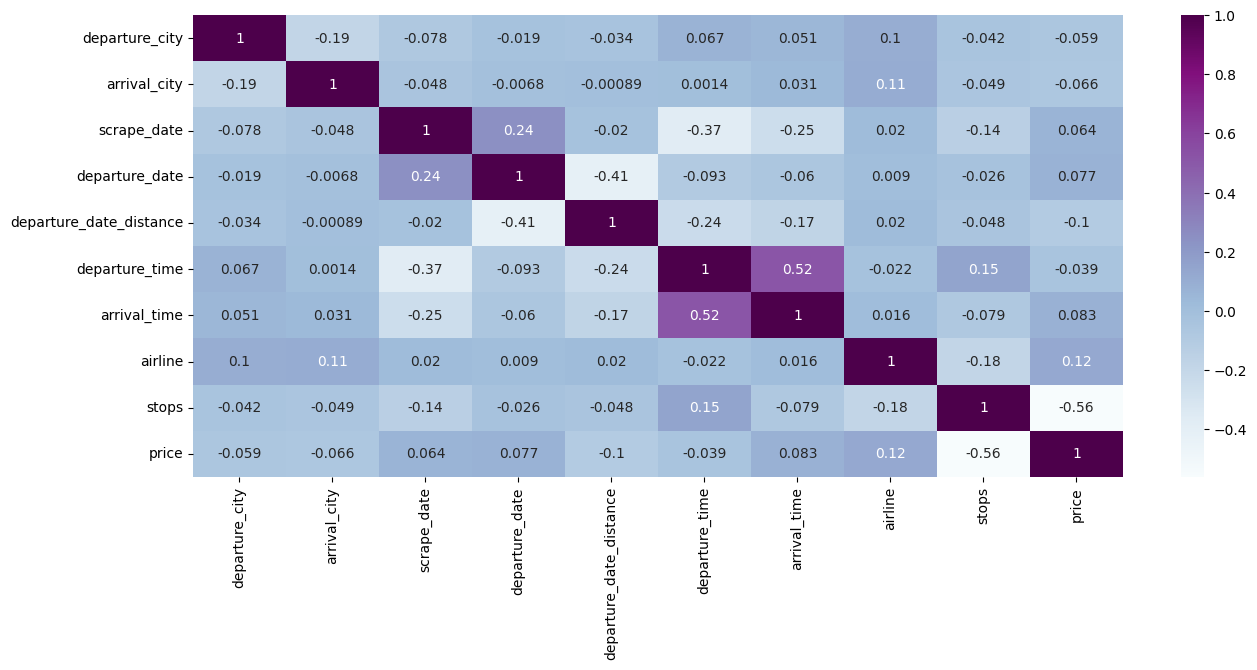

In [ ]:
import seaborn as sns
corr=df2.corr() # gives us the correlation values
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot = True, cmap="BuPu")  # let's visualise the correlation matrix
plt.show()

       departure_city  arrival_city  scrape_date  departure_date  \
0                  18             4            0              33   
1                  18             4            0              33   
2                  18             4            0              33   
3                  18             4            0              33   
4                  18             4            0              33   
...               ...           ...          ...             ...   
62621              17             9            6              31   
62622              17             9            6              31   
62623              17             9            6              31   
62624              17            11            6              31   
62625              17            11            6              31   

       departure_date_distance  departure_time  arrival_time  airline  stops  \
0                            1             321           361        4      2   
1                      

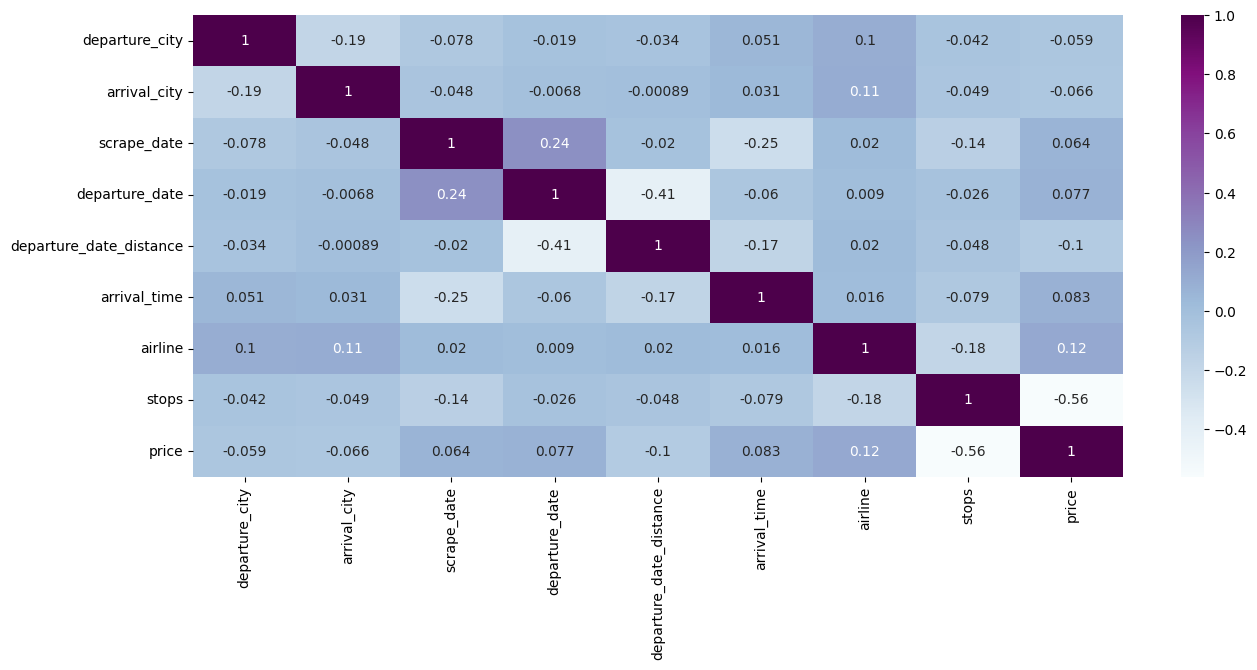

In [ ]:
df_fs = df2
print(df_fs)
df_fs = df_fs.drop('departure_time', axis = 1) #dropping the scrape date as believed to not be relevant
corr=df_fs.corr() # gives us the correlation values
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot = True, cmap="BuPu")  # let's visualise the correlation matrix
plt.show()
#much better

In [ ]:
test = df2.drop(['price'],axis=1)
target = df2['price']
#splits dataset into test and target variables

test.shape


(61822, 9)

# **Regression**

In [ ]:
linreg = linear_model.LinearRegression()
#regression object



In [ ]:

from sklearn.model_selection import cross_val_score

X = test.to_numpy()
y = target.to_numpy()

scaler = StandardScaler()
x_train = scaler.fit_transform(X)

r2 = cross_val_score(linreg, x_train, y, cv=10, scoring='r2').mean()
mae = abs(cross_val_score(linreg, x_train, y, cv=10, scoring='neg_mean_absolute_error').mean())
mse = abs(cross_val_score(linreg, x_train, y, cv=10, scoring='neg_mean_squared_error').mean())
rmse = abs(cross_val_score(linreg, x_train, y, cv=10, scoring='neg_root_mean_squared_error').mean())

#saves to numpy array then get mean

print(f'The r-squared score is: {r2}\n',
      f'The mean absolute score is {mae}\n',
      f'The mean squared error score is {mse}\n',
      f'The root mean squared error score is {rmse}\n')


The r-squared score is: 0.3070461967111396
 The mean absolute score is 79.17517513633959
 The mean squared error score is 9522.666693834874
 The root mean squared error score is 97.43583967938984



One variable

# PCA

In [ ]:
from sklearn.decomposition import PCA

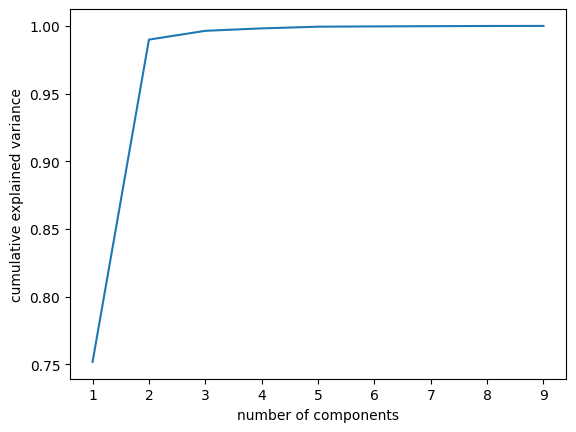

In [ ]:


pca = PCA().fit(test)
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], np.cumsum(pca.explained_variance_ratio_)) #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#can go down to around 3 components without massive loss

In [ ]:
x_reduced = PCA(n_components=3)
x_reduced.fit(test)
test_pca = x_reduced.transform(test)

In [ ]:
test_pca.shape #there is now less components

(61822, 3)

# **Regression with PCA**



In [ ]:
X = test_pca
y = target.to_numpy()

scaler = StandardScaler()
x_train = scaler.fit_transform(X)

r2 = cross_val_score(linreg, x_train, y, cv=10, scoring='r2').mean()
mae = abs(cross_val_score(linreg, x_train, y, cv=10, scoring='neg_mean_absolute_error').mean())
mse = abs(cross_val_score(linreg, x_train, y, cv=10, scoring='neg_mean_squared_error').mean())
rmse = abs(cross_val_score(linreg, x_train, y, cv=10, scoring='neg_root_mean_squared_error').mean())

print(f'The r-squared score is: {r2}\n',
      f'The mean absolute score is {mae}\n',
      f'The mean squared error score is {mse}\n',
      f'The root mean squared error score is {rmse}\n')

The r-squared score is: -0.045955551303943444
 The mean absolute score is 105.26705924616745
 The mean squared error score is 14500.127389398791
 The root mean squared error score is 120.28614939512485



# Regression with Feature Selection

In [ ]:
test = df_fs.drop(['price'],axis=1)
target = df_fs['price']

X = test.to_numpy()
y = target.to_numpy()

scaler = StandardScaler()
x_train = scaler.fit_transform(X)

r2 = cross_val_score(linreg, x_train, y, cv=10, scoring='r2').mean()
mae = abs(cross_val_score(linreg, x_train, y, cv=10, scoring='neg_mean_absolute_error').mean())
mse = abs(cross_val_score(linreg, x_train, y, cv=10, scoring='neg_mean_squared_error').mean())
rmse = abs(cross_val_score(linreg, x_train, y, cv=10, scoring='neg_root_mean_squared_error').mean())

print(f'The r-squared score is: {r2}\n',
      f'The mean absolute score is {mae}\n',
      f'The mean squared error score is {mse}\n',
      f'The root mean squared error score is {rmse}\n')

The r-squared score is: 0.3073020326184636
 The mean absolute score is 79.16453855650214
 The mean squared error score is 9518.929726270098
 The root mean squared error score is 97.41865593503533



# Support Vector Regression

In [ ]:
test = df2.drop('price',axis=1)
target = df2['price']


X = test.to_numpy()
y = target.to_numpy()


scaler = StandardScaler()
x_train = scaler.fit_transform(X)

svm_regressor = SVR(kernel='rbf', C=100, gamma='auto')












In [ ]:
r2 = cross_val_score(svm_regressor, x_train, y, cv=10, scoring='r2').mean()

In [ ]:
mae = abs(cross_val_score(svm_regressor, x_train, y, cv=10, scoring='neg_mean_absolute_error').mean())

In [ ]:
mse = abs(cross_val_score(svm_regressor, x_train, y, cv=10, scoring='neg_mean_squared_error').mean())

In [ ]:
rmse = abs(cross_val_score(svm_regressor, x_train, y, cv=10, scoring='neg_root_mean_squared_error').mean())

In [ ]:
print(f'The r-squared score is: {r2}\n',
      f'The mean absolute score is {mae}\n',
      f'The mean squared error score is {mse}\n',
      f'The root mean squared error score is {rmse}\n')

The r-squared score is: 0.5353001226225601
 The mean absolute score is 54.22859371642677
 The mean squared error score is 6540.623670623281
 The root mean squared error score is 79.69699411252877



# Support Vector Regression with Feature Selection

In [ ]:
test = df_fs.drop(['price'],axis=1)
target = df_fs['price']
#splits dataset into test and target variables

X = test
y = target.to_numpy()

scaler = StandardScaler()
x_train = scaler.fit_transform(X)

svm_regressor = SVR(kernel='rbf', C=100, gamma='auto')






In [ ]:
r2 = cross_val_score(svm_regressor, x_train, y, cv=10, scoring='r2').mean()

In [ ]:
mae = abs(cross_val_score(svm_regressor, x_train, y, cv=10, scoring='neg_mean_absolute_error').mean())

In [ ]:
mse = abs(cross_val_score(svm_regressor, x_train, y, cv=10, scoring='neg_mean_squared_error').mean())

In [ ]:
rmse = abs(cross_val_score(svm_regressor, x_train, y, cv=10, scoring='neg_root_mean_squared_error').mean())

In [ ]:
print(f'The r-squared score is: {r2}\n',
      f'The mean absolute score is {mae}\n',
      f'The mean squared error score is {mse}\n',
      f'The root mean squared error score is {rmse}\n')

The r-squared score is: 0.5499050746907008
 The mean absolute score is 53.921745943982515
 The mean squared error score is 6333.944332881727
 The root mean squared error score is 78.42436548053297



# Support Vector Regression with PCA

In [ ]:
test = df2.drop('price',axis=1)
target = df2['price']


X = test_pca
y = target.to_numpy()

scaler = StandardScaler()
x_train = scaler.fit_transform(X)








In [ ]:
r2 = cross_val_score(svm_regressor, x_train, y, cv=10, scoring='r2').mean()

In [ ]:
mae = abs(cross_val_score(svm_regressor, x_train, y, cv=10, scoring='neg_mean_absolute_error').mean())

In [ ]:
mse = abs(cross_val_score(svm_regressor, x_train, y, cv=10, scoring='neg_mean_squared_error').mean())

In [ ]:
rmse = abs(cross_val_score(svm_regressor, x_train, y, cv=10, scoring='neg_root_mean_squared_error').mean())

In [ ]:
print(f'The r-squared score is: {r2}\n',
      f'The mean absolute score is {mae}\n',
      f'The mean squared error score is {mse}\n',
      f'The root mean squared error score is {rmse}\n')

The r-squared score is: 0.08398385438301774
 The mean absolute score is 88.36771654302838
 The mean squared error score is 12758.162108454626
 The root mean squared error score is 112.48948030368072



# Decision Trees


In [ ]:
test = df2.drop('price',axis=1)
target = df2['price']

dt_regressor = DecisionTreeRegressor(random_state=42)

X = test
y = target.to_numpy()

scaler = StandardScaler()
x_train = scaler.fit_transform(X)

r2 = cross_val_score(dt_regressor, x_train, y, cv=10, scoring='r2').mean()
mae = abs(cross_val_score(dt_regressor, x_train, y, cv=10, scoring='neg_mean_absolute_error').mean())
mse = abs(cross_val_score(dt_regressor, x_train, y, cv=10, scoring='neg_mean_squared_error').mean())
rmse = abs(cross_val_score(dt_regressor, x_train, y, cv=10, scoring='neg_root_mean_squared_error').mean())

print(f'The r-squared score is: {r2}\n',
      f'The mean absolute score is {mae}\n',
      f'The mean squared error score is {mse}\n',
      f'The root mean squared error score is {rmse}\n')




The r-squared score is: 0.6846968903807185
 The mean absolute score is 33.78778039764535
 The mean squared error score is 4449.145936583822
 The root mean squared error score is 65.51962189498431



# Decision Trees with Feature Selection

In [ ]:

test = df_fs.drop(['price'],axis=1)
target = df_fs['price']


X = test.to_numpy()
y = target.to_numpy()


scaler = StandardScaler()
x_train = scaler.fit_transform(X)

r2 = cross_val_score(dt_regressor, x_train, y, cv=10, scoring='r2').mean()
mae = abs(cross_val_score(dt_regressor, x_train, y, cv=10, scoring='neg_mean_absolute_error').mean())
mse = abs(cross_val_score(dt_regressor, x_train, y, cv=10, scoring='neg_mean_squared_error').mean())
rmse = abs(cross_val_score(dt_regressor, x_train, y, cv=10, scoring='neg_root_mean_squared_error').mean())

print(f'The r-squared score is: {r2}\n',
      f'The mean absolute score is {mae}\n',
      f'The mean squared error score is {mse}\n',
      f'The root mean squared error score is {rmse}\n')




The r-squared score is: 0.6735202375172263
 The mean absolute score is 36.3001517051524
 The mean squared error score is 4613.762434528864
 The root mean squared error score is 66.68567826309685



# Decision Trees with PCA

In [ ]:
test = df2.drop('price',axis=1)
target = df2['price']


X = test_pca
y = target.to_numpy()


scaler = StandardScaler()
x_train = scaler.fit_transform(X)

r2 = cross_val_score(dt_regressor, x_train, y, cv=10, scoring='r2').mean()
mae = abs(cross_val_score(dt_regressor, x_train, y, cv=10, scoring='neg_mean_absolute_error').mean())
mse = abs(cross_val_score(dt_regressor, x_train, y, cv=10, scoring='neg_mean_squared_error').mean())
rmse = abs(cross_val_score(dt_regressor, x_train, y, cv=10, scoring='neg_root_mean_squared_error').mean())

print(f'The r-squared score is: {r2}\n',
      f'The mean absolute score is {mae}\n',
      f'The mean squared error score is {mse}\n',
      f'The root mean squared error score is {rmse}\n')

The r-squared score is: -0.12293819976886519
 The mean absolute score is 85.81697470691485
 The mean squared error score is 15716.040301057641
 The root mean squared error score is 124.18367463401441

